In [1]:
#importing of the important libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info() #the total information about the data set we are using to create the predective model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#the basic statistical knowledge about the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:

df_data_copy = df.copy(deep = True)
df_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [7]:
df_data_copy['Glucose'].fillna(df_data_copy['Glucose'].mean(), inplace = True)
df_data_copy['BloodPressure'].fillna(df_data_copy['BloodPressure'].mean(), inplace = True)
df_data_copy['SkinThickness'].fillna(df_data_copy['SkinThickness'].median(), inplace = True)
df_data_copy['Insulin'].fillna(df_data_copy['Insulin'].median(), inplace = True)
df_data_copy['BMI'].fillna(df_data_copy['BMI'].median(), inplace = True)

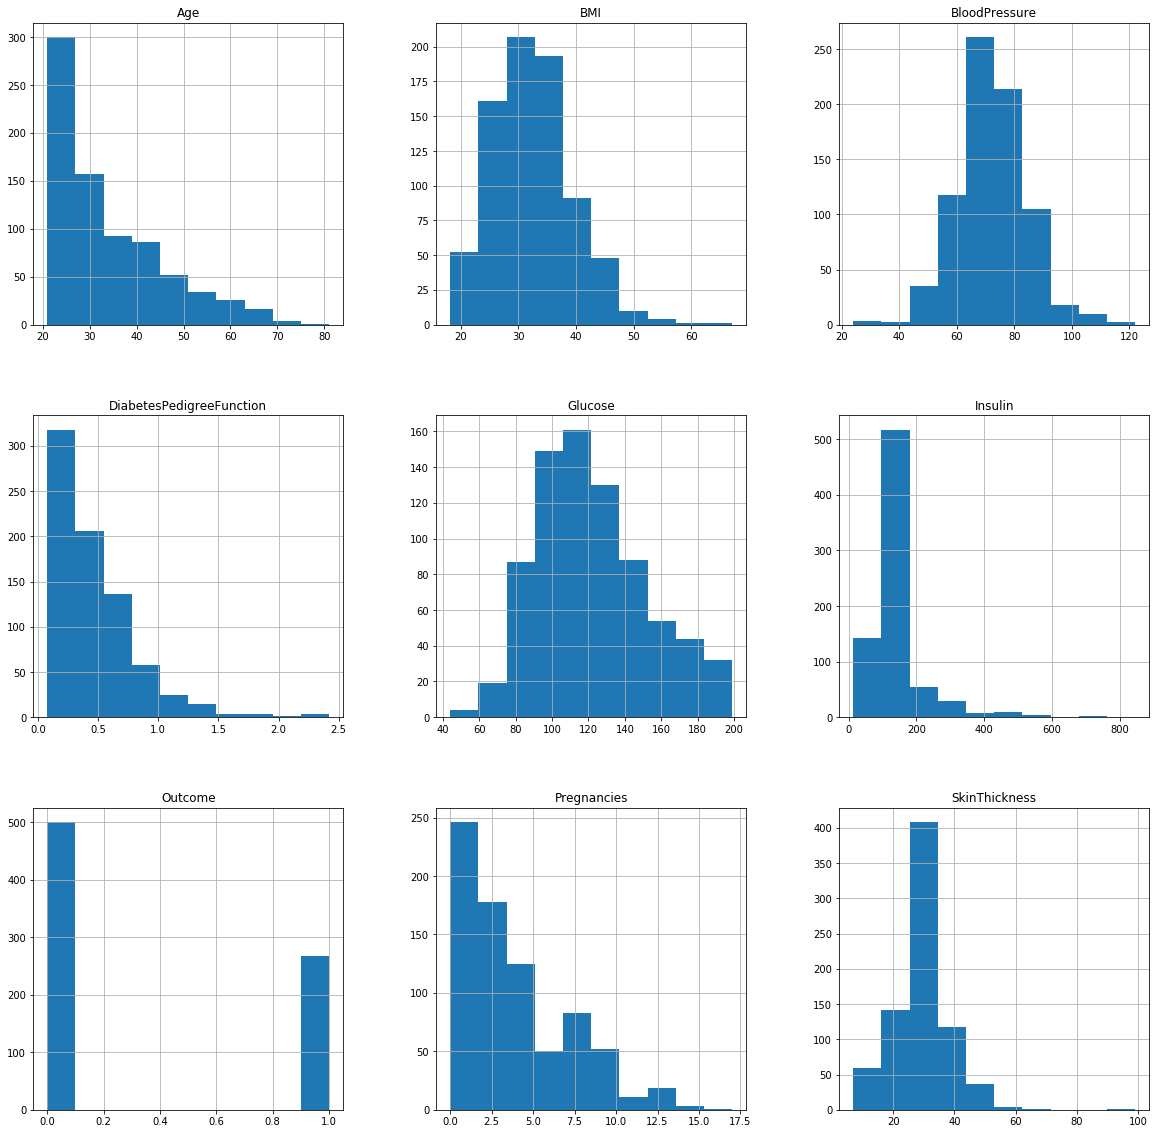

In [8]:
p = df_data_copy.hist(figsize = (20,20))

In [9]:
df.shape

(768, 9)

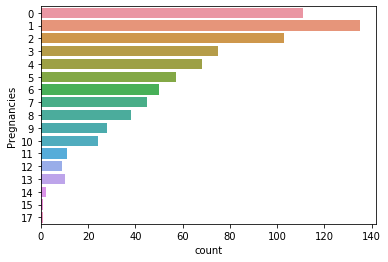

In [10]:
sns.countplot(y=df.Pregnancies, data=df)
plt.show()

In [11]:
col_name=df.columns
print(col_name)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [12]:
y=df.Glucose
drop_cols=['Glucose']
x=df.drop(drop_cols,axis=1)
y.head()

0    148
1     85
2    183
3     89
4    137
Name: Glucose, dtype: int64

In [13]:
x.head()

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,72,35,0,33.6,0.627,50,1
1,1,66,29,0,26.6,0.351,31,0
2,8,64,0,0,23.3,0.672,32,1
3,1,66,23,94,28.1,0.167,21,0
4,0,40,35,168,43.1,2.288,33,1


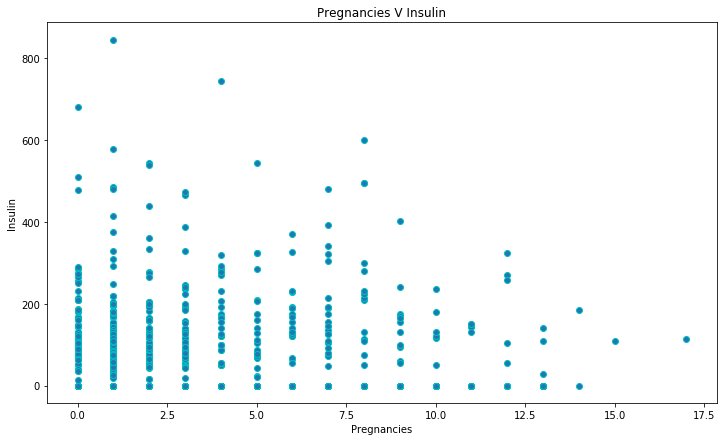

In [14]:
plt.figure(figsize=(12,7))
plt.scatter("Pregnancies","Insulin", data=df,edgecolor='c')
plt.title("Pregnancies V Insulin")
plt.xlabel("Pregnancies")
plt.ylabel("Insulin")
plt.show()

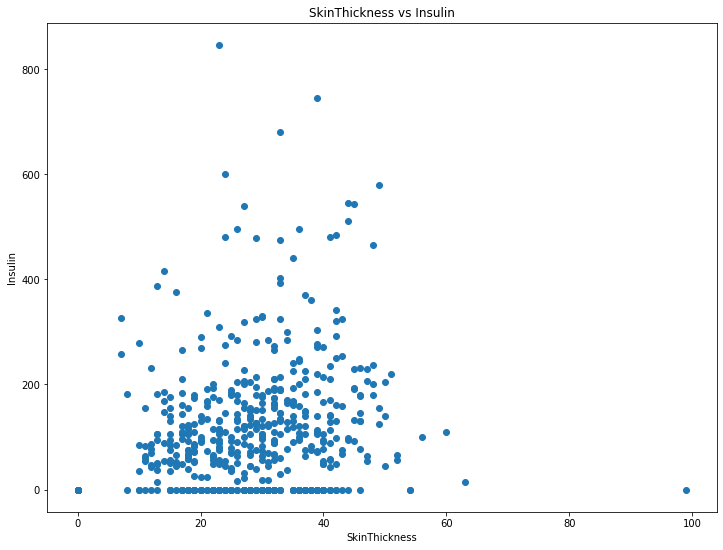

In [15]:
plt.figure(figsize=(12,9))
plt.scatter("SkinThickness","Insulin",data=df)
plt.title("SkinThickness vs Insulin")
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()

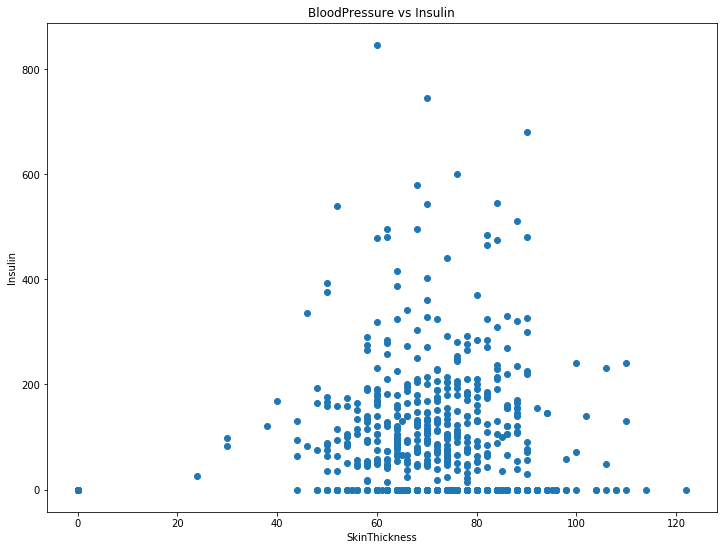

In [16]:
plt.figure(figsize=(12,9))
plt.scatter("BloodPressure","Insulin",data=df)
plt.title("BloodPressure vs Insulin")
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()

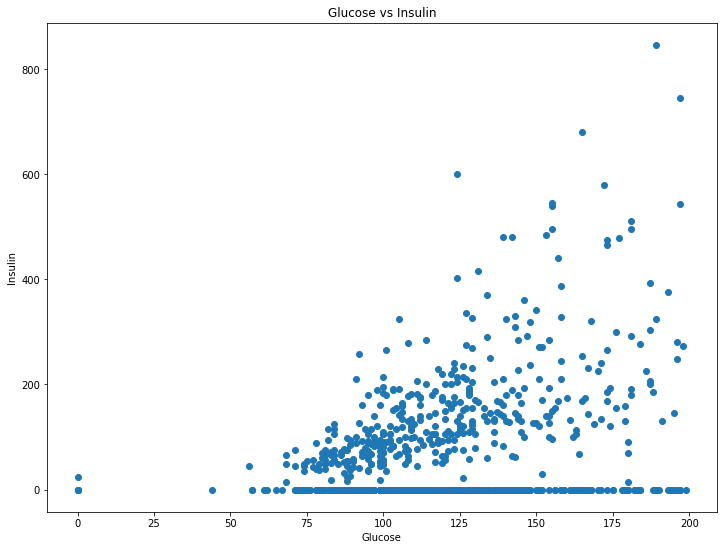

In [17]:
plt.figure(figsize=(12,9))
plt.scatter("Glucose","Insulin",data=df)
plt.title("Glucose vs Insulin")
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

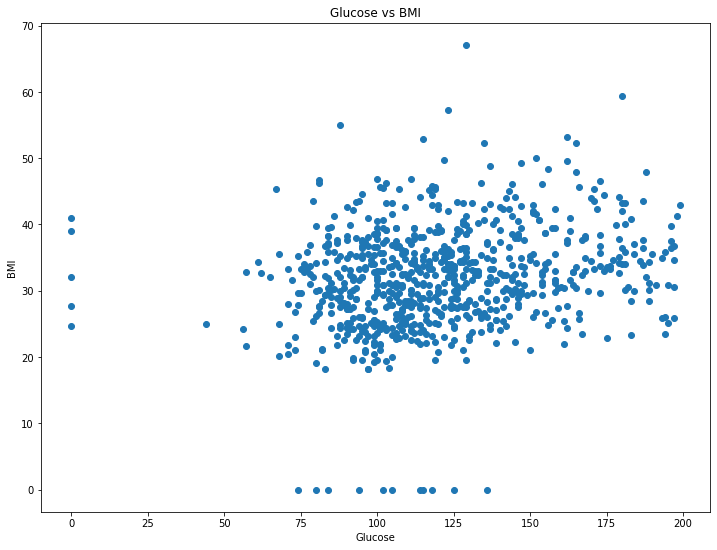

In [18]:
plt.figure(figsize=(12,9))
plt.scatter("Glucose","BMI",data=df)
plt.title("Glucose vs BMI")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.show()

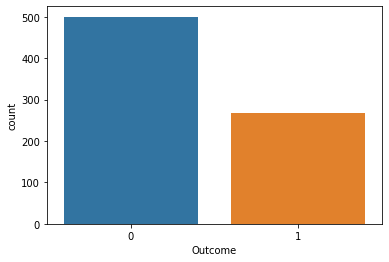

In [19]:
sns.countplot(df['Outcome'])

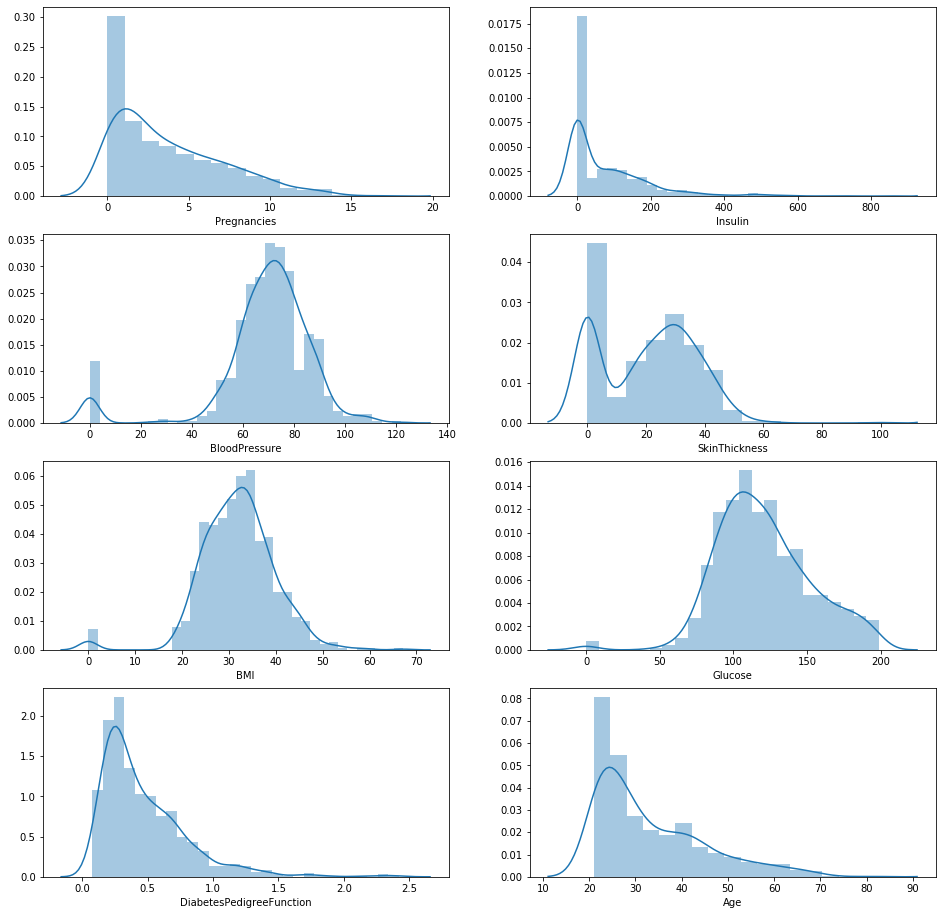

In [21]:
fig, ax2 = plt.subplots(4, 2, figsize=(16, 16))
sns.distplot(df['Pregnancies'],ax=ax2[0][0])
sns.distplot(df['Insulin'],ax=ax2[0][1])
sns.distplot(df['BloodPressure'],ax=ax2[1][0])
sns.distplot(df['SkinThickness'],ax=ax2[1][1])
sns.distplot(df['BMI'],ax=ax2[2][0])
sns.distplot(df['Glucose'],ax=ax2[2][1])
sns.distplot(df['DiabetesPedigreeFunction'],ax=ax2[3][0])
sns.distplot(df['Age'],ax=ax2[3][1])